In [1]:
# Import the packages we will use
import matplotlib.pyplot as plt
import numpy as np
import pandas
import h5py

import cooler

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# The following directive activates inline plotting
%matplotlib inline

In [3]:
# Download a multiresoltion Dictyostelium file
!wget -nc http://makarich.fbb.msu.ru/agalicina/Lab_open/DICTY/COOL/Dicty_0A.1000.cool.multires

Файл «Dicty_0A.1000.cool.multires» уже существует — не загружается.



In [4]:
h5 = h5py.File('Dicty_2A.1000.cool.multires', 'r')

In [5]:
list(h5.keys())

['resolutions']

In [6]:
list(h5['resolutions'])

['1000',
 '10000',
 '100000',
 '1000000',
 '2000',
 '20000',
 '3000',
 '30000',
 '4000',
 '5000',
 '50000']

In [7]:
list(h5['resolutions']['1000']['pixels'].keys())

['bin1_id', 'bin2_id', 'count']

## Cooler

In [8]:
filepath = 'Dicty_8A.1000.cool.multires::resolutions/1000'

In [9]:
c = cooler.Cooler(filepath)

In [10]:
c.info

{'bin-size': 1000,
 'bin-type': 'fixed',
 'creation-date': '2018-04-27T22:13:17.602833',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.8',
 'genome-assembly': 'dicty',
 'metadata': {},
 'nbins': 33947,
 'nchroms': 6,
 'nnz': 7237641,
 'sum': 13738093}

In [11]:
c.chroms()[:]

,name,length
0,chr1,4923596
1,chr2,8484197
2,chr3,6357299
3,chr4,5450249
4,chr5,5125352
5,chr6,3602379


In [12]:
c.binsize

1000

In [13]:
c.chromsizes

name
chr1    4923596
chr2    8484197
chr3    6357299
chr4    5450249
chr5    5125352
chr6    3602379
Name: length, dtype: int32

In [14]:
c.pixels

<bound method Cooler.pixels of <Cooler "Dicty_8A.1000.cool.multires::/resolutions/1000">>

### Get chromosome 1 bins

In [15]:
bins = c.bins()[:]

In [16]:
bins_num = bins[bins.chrom == 'chr1'].shape[0]
bins_num

4924

In [17]:
bins[bins.chrom == 'chr1'].index.values

array([   0,    1,    2, ..., 4921, 4922, 4923])

In [18]:
indx = bins[bins.chrom == 'chr1'].index.values

In [19]:
start = indx[0]
end = indx[-1]

In [20]:
mat = c.matrix(balance=False, sparse=True)[start:end, start:end]

In [21]:
arr = mat.toarray()
arr

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  1, 28,  5],
       [ 0,  0,  0, ..., 28,  6, 19],
       [ 0,  0,  0, ...,  5, 19,  0]], dtype=int32)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


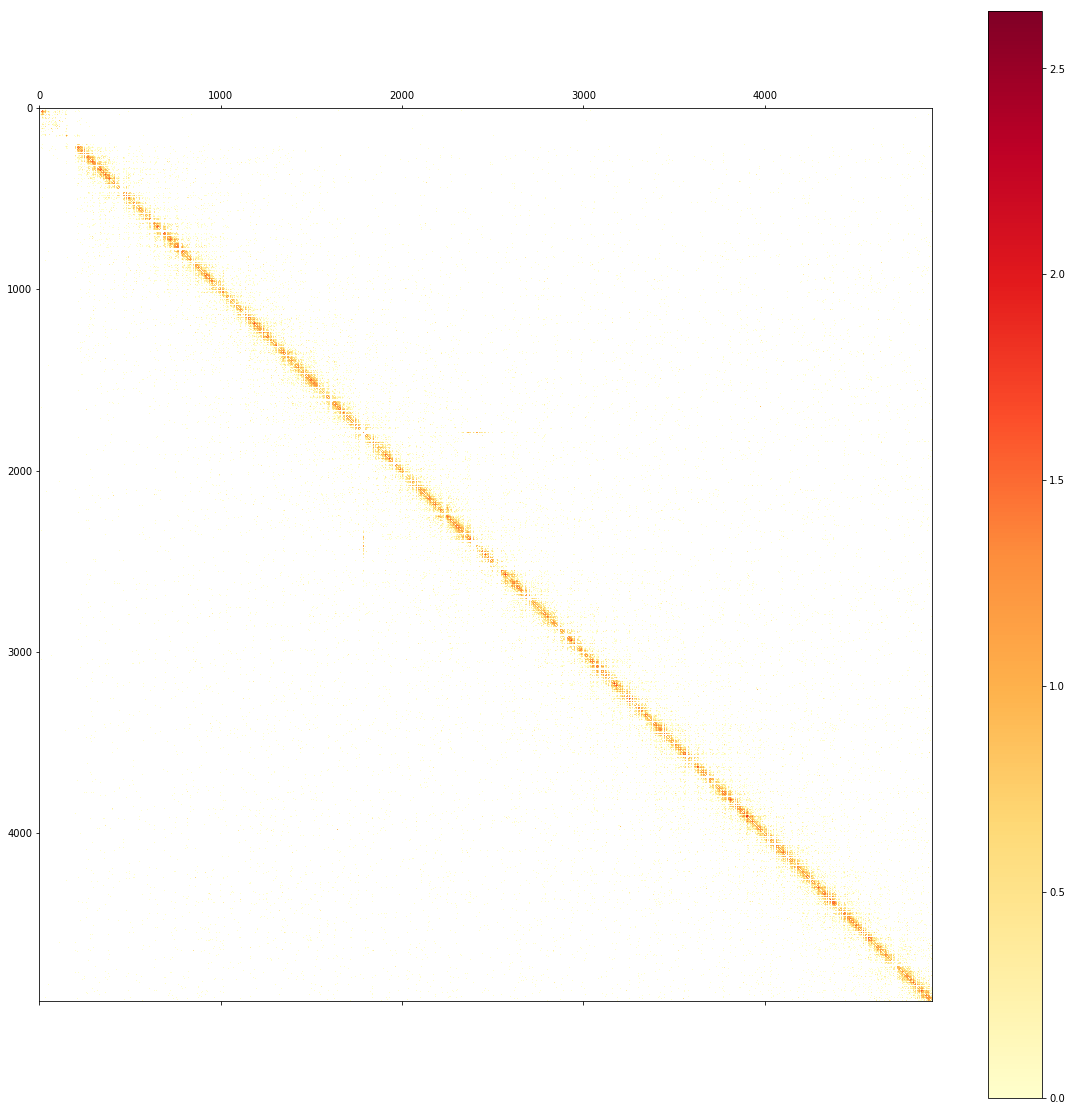

In [22]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)

### Get chromosome 6 bins

In [23]:
bins_num = bins[bins.chrom == 'chr6'].shape[0]
bins_num

3603

In [24]:
indx = bins[bins.chrom == 'chr6'].index.values

In [25]:
start = indx[0]
end = indx[-1]

In [26]:
mat = c.matrix(balance=False, sparse=True)[start:end, start:end]

In [27]:
arr = mat.toarray()
arr

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


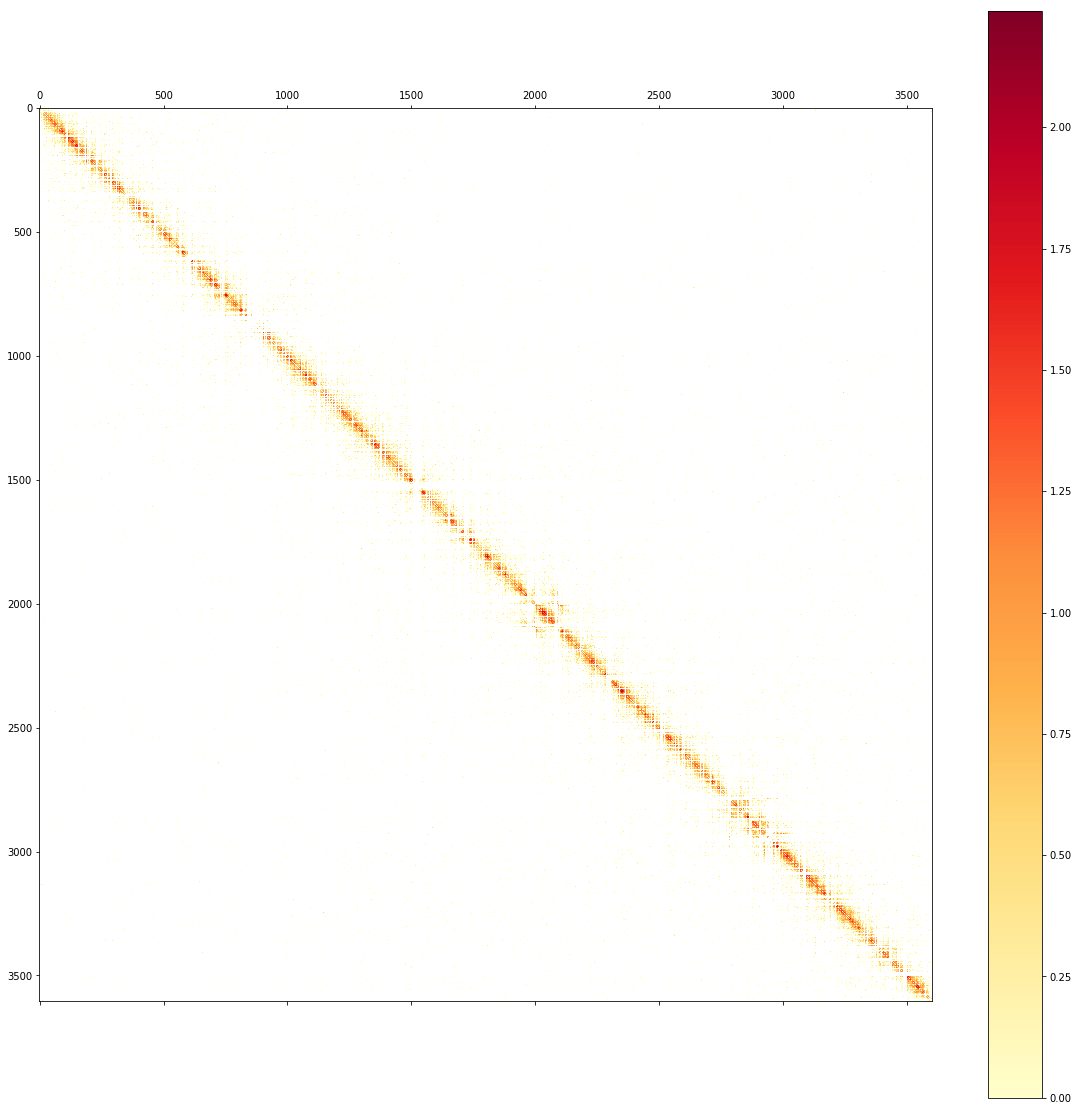

In [28]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
im = ax.matshow(np.log10(arr), cmap='YlOrRd')
fig.colorbar(im)